In [2]:
import matplotlib.font_manager as mp

In [3]:
#Felipe Orlando Morais
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [20]:
corr_with="E$_{ad}$" #Correlate all properties with this one

el="Fe"
ch="CH4"

element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"


#CH4 e CH3
Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))

X=[]
index=[]
#12
for i in range(12):
    achar=[]
    
    elementname=el+"$_{"+str(i+4)+"}$"
    Datai='Data'+str(i)
    Data= globals()[Datai]
    
    Data["quem"] = Data["name"] + Data["dir"]
    
    achar = Data["quem"].tolist()
    for h in range(len(achar)):
        index.append(achar[h])
# "name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$"
#,"${\epsilon}_{lumo}$","$E_g$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"   
    
    Data=Data.dropna()
    Data= Data.drop("quem", 1)
    Data= Data.drop("dir", 1)
    Data= Data.drop("name", 1)
    Data= Data.drop("${\Delta}E_{tot}$", 1)
    Data= Data.drop("$m_{tot}$", 1)
    Data= Data.drop("${\epsilon}_{homo}$", 1)
    Data= Data.drop("${\epsilon}_{lumo}$", 1)
    Data= Data.drop("$E_g$", 1)
    
    Data= Data.drop("${\Delta}$ECN$_{av}$", 1)
    Data= Data.drop("${\Delta}d_{av}$", 1)
    Data= Data.drop('$E_{tot}$', 1)    
    Data=Data.astype('float64')
    
    for rows in Data.itertuples(index=False, name=None):
    # append the list to the final list
        X.append(rows)

        
el="Co"


element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"


#CH4 e CH3
Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))


#12
for i in range(12):
    achar=[]
    
    elementname=el+"$_{"+str(i+4)+"}$"
    Datai='Data'+str(i)
    Data= globals()[Datai]
    
    Data["quem"] = Data["name"] + Data["dir"]
    
    achar = Data["quem"].tolist()
    for h in range(len(achar)):
        index.append(achar[h])  
    Data=Data.dropna()
    Data= Data.drop("quem", 1)
    Data= Data.drop("dir", 1)
    Data= Data.drop("name", 1)
    Data= Data.drop("${\Delta}E_{tot}$", 1)
    Data= Data.drop("$m_{tot}$", 1)
    Data= Data.drop("${\epsilon}_{homo}$", 1)
    Data= Data.drop("${\epsilon}_{lumo}$", 1)
    Data= Data.drop("$E_g$", 1)
    
    Data= Data.drop("${\Delta}$ECN$_{av}$", 1)
    Data= Data.drop("${\Delta}d_{av}$", 1)
    Data= Data.drop('$E_{tot}$', 1)    
    Data=Data.astype('float64')
    
    for rows in Data.itertuples(index=False, name=None):
    # append the list to the final list
        X.append(rows)

     
    
el="Cu"


element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"


#CH4 e CH3
Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))


#12
for i in range(12):
    achar=[]
    
    elementname=el+"$_{"+str(i+4)+"}$"
    Datai='Data'+str(i)
    Data= globals()[Datai]
    
    Data["quem"] = Data["name"] + Data["dir"]
    
    achar = Data["quem"].tolist()
    for h in range(len(achar)):
        index.append(achar[h])  
    Data=Data.dropna()
    Data= Data.drop("quem", 1)
    Data= Data.drop("dir", 1)
    Data= Data.drop("name", 1)
    Data= Data.drop("${\Delta}E_{tot}$", 1)
    Data= Data.drop("$m_{tot}$", 1)
    Data= Data.drop("${\epsilon}_{homo}$", 1)
    Data= Data.drop("${\epsilon}_{lumo}$", 1)
    Data= Data.drop("$E_g$", 1)
    
    Data= Data.drop("${\Delta}$ECN$_{av}$", 1)
    Data= Data.drop("${\Delta}d_{av}$", 1)
    Data= Data.drop('$E_{tot}$', 1)    
    Data=Data.astype('float64')
    
    for rows in Data.itertuples(index=False, name=None):
    # append the list to the final list
        X.append(rows)    
        
        
        
el="Ni"


element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"


#CH4 e CH3
Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))


#12
for i in range(12):
    achar=[]
    
    elementname=el+"$_{"+str(i+4)+"}$"
    Datai='Data'+str(i)
    Data= globals()[Datai]
    
    Data["quem"] = Data["name"] + Data["dir"]
    
    achar = Data["quem"].tolist()
    for h in range(len(achar)):
        index.append(achar[h])  
    Data=Data.dropna()
    Data= Data.drop("quem", 1)
    Data= Data.drop("dir", 1)
    Data= Data.drop("name", 1)
    Data= Data.drop("${\Delta}E_{tot}$", 1)
    Data= Data.drop("$m_{tot}$", 1)
    Data= Data.drop("${\epsilon}_{homo}$", 1)
    Data= Data.drop("${\epsilon}_{lumo}$", 1)
    Data= Data.drop("$E_g$", 1)
    
    Data= Data.drop("${\Delta}$ECN$_{av}$", 1)
    Data= Data.drop("${\Delta}d_{av}$", 1)
    Data= Data.drop('$E_{tot}$', 1)    
    Data=Data.astype('float64')
    
    for rows in Data.itertuples(index=False, name=None):
    # append the list to the final list
        X.append(rows)
            

Selected: 
[array([-3.8792243,  7.130684 ], dtype=float32), array([ -0.1444018, -35.694252 ], dtype=float32), array([41.95435  , -3.4343731], dtype=float32), array([-39.45911 , -16.488213], dtype=float32)]
['Co15-CH420', 'Fe09-CH416', 'Ni13-CH424', 'Co05-CH47']


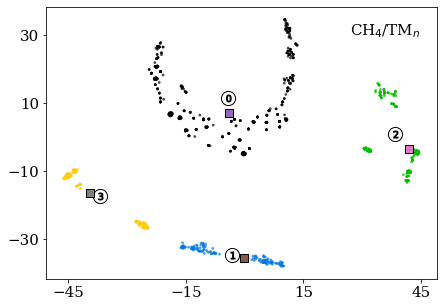

In [21]:
numero=4
X = np.array(X)
XX=X

X = StandardScaler().fit_transform(X) 

tsnee = TSNE(n_components=2,perplexity=35,random_state=432) ####
##CH4 EH 35 A PERP e CH3 eh 40

X = tsnee.fit_transform(X) ####

kmeans = cluster.KMeans(init='random', #'k-means++', 
        n_clusters=numero, n_init=10, random_state=0)



ax2 = plt.axes()



#clusterer =cluster.KMeans(n_clusters=params['n_clusters'], random_state=10) tem o meu
cluster_labels = kmeans.fit_predict(X)

    # 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / numero)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
	ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)

ax2.xaxis.set_ticks(np.arange(-45, 50, 30))
ax2.yaxis.set_ticks(np.arange(-30, 50, 20))
#ax2.set_xlabel("Feature 1", fontsize=15)
#ax2.set_ylabel("Feature 2", fontsize=15)
ax2.text(27,30,"CH$_4$/TM$_n$", fontsize=15)
plt.gcf().set_size_inches(7, 5)
#plt.suptitle("Silhouette analysis for k-means clustering on sample data", fontsize=14, fontweight='bold')



selected1 = []
clusters = []
val=[]
kmeans.fit(X)
centroids = kmeans.cluster_centers_
if 1==1:
    # for clus in centroids:
    for clus in range(numero):
        idsIn = np.where(kmeans.labels_==clus)
        sel = idsIn[0][0]
        dMin = np.linalg.norm(centroids[clus,:] - X[idsIn[0][0],:])
        for sample in idsIn[0][1:]:
            dist = np.linalg.norm(centroids[clus,:] - X[sample,:])
            if dist < dMin:
                dMin = dist
                sel = sample 
        val.append(X[sel])        
        selected1.append(index[sel])
        clusters.append(idsIn)
print("Selected: ")
print(val)
print(selected1)

for i in val:
	ax2.scatter(i[0], i[1], marker='s', alpha=1, s=60, edgecolor='k')





#print(len(X))    
#print(len(index))    
#f.suptitle("CH$_4$")    #MUDAR AQUI TAMBEM

plt.show()    
#plt.savefig('KmeansTM-CH4.pdf', format='pdf', bbox_inches="tight")

In [6]:
selected1 = []
clusters = []
val=[]
kmeans.fit(X)
centroids = kmeans.cluster_centers_
if 1==1:
    # for clus in centroids:
    for clus in range(numero):
        idsIn = np.where(kmeans.labels_==clus)
        sel = idsIn[0][0]
        dMin = np.linalg.norm(centroids[clus,:] - X[idsIn[0][0],:])
        for sample in idsIn[0][1:]:
            dist = np.linalg.norm(centroids[clus,:] - X[sample,:])
            if dist < dMin:
                dMin = dist
                sel = sample 
        val.append(XX[sel])        
        selected1.append(index[sel])
        clusters.append(idsIn)
#print("Selected: ")
#print(selected1)
#print(val)
a=selected1

print(centroids)


[[ -4.2459574   11.535967  ]
 [ -3.1692944  -34.702576  ]
 [ 38.387554     0.80383855]
 [-36.904865   -17.337288  ]]


In [ ]:
Selected [op1]: 
['Co15-CH420', 'Fe09-CH416', 'Ni13-CH424', 'Co05-CH47']
[array([  2.  ,   2.48, 109.48]), array([  2.93,   3.53, 109.47]), array([  1.83,   2.21, 109.48]), array([  1.85,   2.12, 109.41])]

In [11]:
corr_with="E$_{ad}$" #Correlate all properties with this one

el="Fe"
ch="CH3+H"

element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"


#CH3+H
Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))

X=[]
index=[]
#12
for i in range(12):
    achar=[]
    
    elementname=el+"$_{"+str(i+4)+"}$"
    Datai='Data'+str(i)
    Data= globals()[Datai]
    
    Data["quem"] = Data["name"] + Data["dir"]
    
    achar = Data["quem"].tolist()
    for h in range(len(achar)):
        index.append(achar[h])
# "name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$"
#,"${\epsilon}_{lumo}$","$E_g$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"   
    
    Data=Data.dropna()
    Data= Data.drop("quem", 1)
    Data= Data.drop("dir", 1)
    Data= Data.drop("name", 1)
    Data= Data.drop("${\Delta}E_{tot}$", 1)
    Data= Data.drop("$m_{tot}$", 1)
    Data= Data.drop("${\epsilon}_{homo}$", 1)
    Data= Data.drop("${\epsilon}_{lumo}$", 1)
    Data= Data.drop("$E_g$", 1)
    
    Data= Data.drop("${\Delta}$ECN$_{av}$", 1)
    Data= Data.drop("${\Delta}d_{av}$", 1)
    Data= Data.drop('$E_{tot}$', 1)    
    Data=Data.astype('float64')
    
    for rows in Data.itertuples(index=False, name=None):
    # append the list to the final list
        X.append(rows)

        
el="Co"


element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"


#CH4 e CH3
Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))


#12
for i in range(12):
    achar=[]
    
    elementname=el+"$_{"+str(i+4)+"}$"
    Datai='Data'+str(i)
    Data= globals()[Datai]
    
    Data["quem"] = Data["name"] + Data["dir"]
    
    achar = Data["quem"].tolist()
    for h in range(len(achar)):
        index.append(achar[h])  
    Data=Data.dropna()
    Data= Data.drop("quem", 1)
    Data= Data.drop("dir", 1)
    Data= Data.drop("name", 1)
    Data= Data.drop("${\Delta}E_{tot}$", 1)
    Data= Data.drop("$m_{tot}$", 1)
    Data= Data.drop("${\epsilon}_{homo}$", 1)
    Data= Data.drop("${\epsilon}_{lumo}$", 1)
    Data= Data.drop("$E_g$", 1)
    
    Data= Data.drop("${\Delta}$ECN$_{av}$", 1)
    Data= Data.drop("${\Delta}d_{av}$", 1)
    Data= Data.drop('$E_{tot}$', 1)    
    Data=Data.astype('float64')
    
    for rows in Data.itertuples(index=False, name=None):
    # append the list to the final list
        X.append(rows)

     
    
el="Cu"


element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"


Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))


#12
for i in range(12):
    achar=[]
    
    elementname=el+"$_{"+str(i+4)+"}$"
    Datai='Data'+str(i)
    Data= globals()[Datai]
    
    Data["quem"] = Data["name"] + Data["dir"]
    
    achar = Data["quem"].tolist()
    for h in range(len(achar)):
        index.append(achar[h])  
    Data=Data.dropna()
    Data= Data.drop("quem", 1)
    Data= Data.drop("dir", 1)
    Data= Data.drop("name", 1)
    Data= Data.drop("${\Delta}E_{tot}$", 1)
    Data= Data.drop("$m_{tot}$", 1)
    Data= Data.drop("${\epsilon}_{homo}$", 1)
    Data= Data.drop("${\epsilon}_{lumo}$", 1)
    Data= Data.drop("$E_g$", 1)
    
    Data= Data.drop("${\Delta}$ECN$_{av}$", 1)
    Data= Data.drop("${\Delta}d_{av}$", 1)
    Data= Data.drop('$E_{tot}$', 1)    
    Data=Data.astype('float64')
    
    for rows in Data.itertuples(index=False, name=None):
    # append the list to the final list
        X.append(rows)    
        
        
        
el="Ni"


element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"


Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))


#12
for i in range(12):
    achar=[]
    
    elementname=el+"$_{"+str(i+4)+"}$"
    Datai='Data'+str(i)
    Data= globals()[Datai]
    
    Data["quem"] = Data["name"] + Data["dir"]
    
    achar = Data["quem"].tolist()
    for h in range(len(achar)):
        index.append(achar[h])  
    Data=Data.dropna()
    Data= Data.drop("quem", 1)
    Data= Data.drop("dir", 1)
    Data= Data.drop("name", 1)
    Data= Data.drop("${\Delta}E_{tot}$", 1)
    Data= Data.drop("$m_{tot}$", 1)
    Data= Data.drop("${\epsilon}_{homo}$", 1)
    Data= Data.drop("${\epsilon}_{lumo}$", 1)
    Data= Data.drop("$E_g$", 1)
    
    Data= Data.drop("${\Delta}$ECN$_{av}$", 1)
    Data= Data.drop("${\Delta}d_{av}$", 1)
    Data= Data.drop('$E_{tot}$', 1)    
    Data=Data.astype('float64')
    
    for rows in Data.itertuples(index=False, name=None):
    # append the list to the final list
        X.append(rows)

#Data
X

[(2.53, 1.99, 3.62, 108.49),
 (2.53, 1.99, 3.62, 108.53),
 (2.53, 1.99, 3.62, 108.5),
 (2.53, 1.99, 3.62, 108.54),
 (2.54, 1.98, 3.41, 109.45),
 (2.54, 1.98, 3.44, 109.48),
 (2.22, 2.1, 3.64, 106.05),
 (2.21, 2.09, 3.64, 106.05),
 (2.53, 1.97, 2.78, 109.61),
 (2.54, 1.97, 2.79, 109.59),
 (2.18, 2.08, 3.15, 106.92),
 (2.17, 2.09, 3.79, 106.24),
 (2.17, 2.08, 3.79, 106.27),
 (2.17, 2.09, 3.79, 106.24),
 (2.58, 1.99, 5.23, 108.33),
 (2.5, 1.96, 2.83, 110.18),
 (2.22, 2.13, 3.79, 106.14),
 (2.19, 2.13, 3.79, 106.11),
 (2.2, 2.13, 3.79, 106.12),
 (2.18, 2.09, 3.66, 106.32),
 (2.17, 2.05, 3.79, 106.15),
 (2.52, 1.97, 2.62, 109.51),
 (2.49, 1.96, 2.77, 109.98),
 (2.5, 1.95, 2.96, 110.07),
 (2.21, 2.08, 3.75, 105.93),
 (2.18, 2.04, 3.7, 106.17),
 (2.13, 2.04, 3.68, 106.23),
 (2.29, 2.11, 3.71, 105.98),
 (2.12, 2.07, 3.7, 106.27),
 (2.49, 1.96, 2.73, 109.56),
 (2.51, 1.99, 3.09, 108.89),
 (2.51, 1.99, 3.09, 108.9),
 (2.51, 1.99, 3.13, 108.84),
 (2.5, 1.96, 2.97, 109.63),
 (2.19, 2.08, 3.64, 106

Selected: 
[array([ -1.1610396, -18.70795  ], dtype=float32), array([ 7.8625298, 23.612364 ], dtype=float32), array([-8.519452, 34.999985], dtype=float32)]


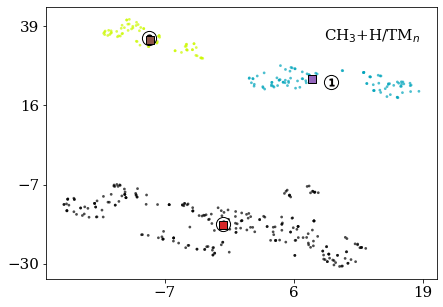

In [12]:
numero=3
X = np.array(X)


X = StandardScaler().fit_transform(X) 


tsnee = TSNE(n_components=2,perplexity=30,random_state=432) ####


X = tsnee.fit_transform(X) ####

kmeans = cluster.KMeans(init='random', #'k-means++', 
        n_clusters=numero, n_init=10, random_state=0)



ax2 = plt.axes()



#clusterer =cluster.KMeans(n_clusters=params['n_clusters'], random_state=10) tem o meu
cluster_labels = kmeans.fit_predict(X)

    # 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / numero)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
	ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
#ax2.set_title("Clustered data from CH$_3$+H/TM$_n$", fontsize=15)
ax2.xaxis.set_ticks(np.arange(-20, 20, 13))
ax2.yaxis.set_ticks(np.arange(-30, 40, 23))
ax2.text(9,35,"CH$_3$+H/TM$_n$", fontsize=15)
plt.gcf().set_size_inches(7, 5)
#plt.suptitle("Silhouette analysis for k-means clustering on sample data", fontsize=14, fontweight='bold')





"""
selected1 = []
clusters = []
val=[]
kmeans.fit(X)
centroids = kmeans.cluster_centers_
if 1==1:
    # for clus in centroids:
    for clus in range(numero):
        idsIn = np.where(kmeans.labels_==clus)
        sel = idsIn[0][0]
        dMin = np.linalg.norm(centroids[clus,:] - X[idsIn[0][0],:])
        for sample in idsIn[0][1:]:
            dist = np.linalg.norm(centroids[clus,:] - X[sample,:])
            if dist < dMin:
                dMin = dist
                sel = sample 
        val.append(X[sel])        
        selected1.append(index[sel])
        clusters.append(idsIn)
print("Selected: ")
print(val)

for i in val:
	ax2.scatter(i[0], i[1], marker='s', alpha=1, s=60, edgecolor='k')
"""













#print(len(X))    
#print(len(index))    
#f.suptitle("CH$_4$")    #MUDAR AQUI TAMBEM
plt.show()    
#plt.savefig('KmeansTM-CH3+H_8.pdf', format='pdf', bbox_inches="tight")


In [8]:
selected1 = []
clusters = []
val=[]
kmeans.fit(X)
centroids = kmeans.cluster_centers_
if 1==1:
    # for clus in centroids:
    for clus in range(numero):
        idsIn = np.where(kmeans.labels_==clus)
        sel = idsIn[0][0]
        dMin = np.linalg.norm(centroids[clus,:] - X[idsIn[0][0],:])
        for sample in idsIn[0][1:]:
            dist = np.linalg.norm(centroids[clus,:] - X[sample,:])
            if dist < dMin:
                dMin = dist
                sel = sample 
        val.append(XX[sel])        
        selected1.append(index[sel])
        clusters.append(idsIn)
print("Selected: ")
print(selected1)
print(val)

Selected: 
['Cu10-CH3+H6', 'Co10-CH3+H17', 'Fe07-CH3+H9']
[array([-0.96408935,  0.49078092,  0.15603846, -1.07008445]), array([ 0.92097718, -0.76748233,  0.17850799,  0.91194226]), array([ 1.22258782, -0.55777179, -1.50670732,  1.53095361])]


In [16]:
corr_with="E$_{ad}$" #Correlate all properties with this one

el="Fe"
ch="H"

element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"


# H
Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))

X=[]
index=[]
#12
for i in range(12):
    achar=[]
    
    elementname=el+"$_{"+str(i+4)+"}$"
    Datai='Data'+str(i)
    Data= globals()[Datai]
    
    Data["quem"] = Data["name"] + Data["dir"]
    
    achar = Data["quem"].tolist()
    for h in range(len(achar)):
        index.append(achar[h])
# "name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$"
#,"${\epsilon}_{lumo}$","$E_g$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"   
    
    Data=Data.dropna()
    Data= Data.drop("quem", 1)
    Data= Data.drop("dir", 1)
    Data= Data.drop("name", 1)
    Data= Data.drop("${\Delta}E_{tot}$", 1)
    Data= Data.drop("$m_{tot}$", 1)
    Data= Data.drop("${\epsilon}_{homo}$", 1)
    Data= Data.drop("${\epsilon}_{lumo}$", 1)
    Data= Data.drop("$E_g$", 1)
    
    Data= Data.drop("${\Delta}$ECN$_{av}$", 1)
    Data= Data.drop("${\Delta}d_{av}$", 1)
    Data= Data.drop('$E_{tot}$', 1)  
    Data= Data.drop("${\\theta}_{av}^{HCH}$", 1)
    Data=Data.astype('float64')
    
    for rows in Data.itertuples(index=False, name=None):
    # append the list to the final list
        X.append(rows)
print(index)
        
el="Co"


element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"

# H
Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))


#12
for i in range(12):
    achar=[]
    
    elementname=el+"$_{"+str(i+4)+"}$"
    Datai='Data'+str(i)
    Data= globals()[Datai]
    
    Data["quem"] = Data["name"] + Data["dir"]
    
    achar = Data["quem"].tolist()
    for h in range(len(achar)):
        index.append(achar[h])  
    Data=Data.dropna()
    Data= Data.drop("quem", 1)
    Data= Data.drop("dir", 1)
    Data= Data.drop("name", 1)
    Data= Data.drop("${\Delta}E_{tot}$", 1)
    Data= Data.drop("$m_{tot}$", 1)
    Data= Data.drop("${\epsilon}_{homo}$", 1)
    Data= Data.drop("${\epsilon}_{lumo}$", 1)
    Data= Data.drop("$E_g$", 1)
    Data= Data.drop("${\\theta}_{av}^{HCH}$", 1)
    Data= Data.drop("${\Delta}$ECN$_{av}$", 1)
    Data= Data.drop("${\Delta}d_{av}$", 1)
    Data= Data.drop('$E_{tot}$', 1)    
    Data=Data.astype('float64')
    
    for rows in Data.itertuples(index=False, name=None):
    # append the list to the final list
        X.append(rows)

     
    
el="Cu"


element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"


# H
Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))


#12
for i in range(12):
    achar=[]
    
    elementname=el+"$_{"+str(i+4)+"}$"
    Datai='Data'+str(i)
    Data= globals()[Datai]
    
    Data["quem"] = Data["name"] + Data["dir"]
    
    achar = Data["quem"].tolist()
    for h in range(len(achar)):
        index.append(achar[h])  
    Data=Data.dropna()
    Data= Data.drop("quem", 1)
    Data= Data.drop("dir", 1)
    Data= Data.drop("name", 1)
    Data= Data.drop("${\Delta}E_{tot}$", 1)
    Data= Data.drop("$m_{tot}$", 1)
    Data= Data.drop("${\epsilon}_{homo}$", 1)
    Data= Data.drop("${\epsilon}_{lumo}$", 1)
    Data= Data.drop("$E_g$", 1)
    Data= Data.drop("${\\theta}_{av}^{HCH}$", 1)
    Data= Data.drop("${\Delta}$ECN$_{av}$", 1)
    Data= Data.drop("${\Delta}d_{av}$", 1)
    Data= Data.drop('$E_{tot}$', 1)    
    Data=Data.astype('float64')
    
    for rows in Data.itertuples(index=False, name=None):
    # append the list to the final list
        X.append(rows)    
        
        
        
el="Ni"


element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"


# H
Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))


#12
for i in range(12):
    achar=[]
    
    elementname=el+"$_{"+str(i+4)+"}$"
    Datai='Data'+str(i)
    Data= globals()[Datai]
    
    Data["quem"] = Data["name"] + Data["dir"]
    
    achar = Data["quem"].tolist()
    for h in range(len(achar)):
        index.append(achar[h])  
    Data=Data.dropna()
    Data= Data.drop("quem", 1)
    Data= Data.drop("dir", 1)
    Data= Data.drop("name", 1)
    Data= Data.drop("${\Delta}E_{tot}$", 1)
    Data= Data.drop("$m_{tot}$", 1)
    Data= Data.drop("${\epsilon}_{homo}$", 1)
    Data= Data.drop("${\epsilon}_{lumo}$", 1)
    Data= Data.drop("$E_g$", 1)
    Data= Data.drop("${\\theta}_{av}^{HCH}$", 1)
    Data= Data.drop("${\Delta}$ECN$_{av}$", 1)
    Data= Data.drop("${\Delta}d_{av}$", 1)
    Data= Data.drop('$E_{tot}$', 1)    
    Data=Data.astype('float64')
    
    for rows in Data.itertuples(index=False, name=None):
    # append the list to the final list
        X.append(rows)
 

['Fe04-H7', 'Fe04-H8', 'Fe04-H3', 'Fe04-H4', 'Fe05-H4', 'Fe05-H9', 'Fe05-H1', 'Fe05-H7', 'Fe06-H7', 'Fe06-H10', 'Fe06-H6', 'Fe06-H1', 'Fe06-H12', 'Fe06-H3', 'Fe07-H6', 'Fe07-H5', 'Fe07-H3', 'Fe07-H7', 'Fe07-H9', 'Fe07-H1', 'Fe07-H2', 'Fe08-H15', 'Fe08-H3', 'Fe08-H9', 'Fe08-H8', 'Fe08-H7', 'Fe08-H13', 'Fe08-H16', 'Fe08-H10', 'Fe09-H18', 'Fe09-H2', 'Fe09-H9', 'Fe09-H4', 'Fe09-H3', 'Fe09-H5', 'Fe09-H7', 'Fe09-H17', 'Fe10-H4', 'Fe10-H18', 'Fe10-H10', 'Fe10-H3', 'Fe10-H9', 'Fe10-H20', 'Fe10-H6', 'Fe10-H15', 'Fe10-H19', 'Fe11-H3', 'Fe11-H1', 'Fe11-H12', 'Fe11-H18', 'Fe11-H11', 'Fe11-H8', 'Fe11-H4', 'Fe11-H22', 'Fe11-H6', 'Fe11-H14', 'Fe11-H19', 'Fe12-H7', 'Fe12-H11', 'Fe12-H4', 'Fe12-H24', 'Fe12-H21', 'Fe12-H16', 'Fe12-H22', 'Fe13-H10', 'Fe13-H2', 'Fe13-H26', 'Fe13-H16', 'Fe13-H18', 'Fe13-H1', 'Fe13-H12', 'Fe13-H6', 'Fe13-H15', 'Fe13-H5', 'Fe13-H17', 'Fe13-H21', 'Fe13-H7', 'Fe14-H12', 'Fe14-H7', 'Fe14-H13', 'Fe14-H11', 'Fe14-H5', 'Fe14-H26', 'Fe14-H9', 'Fe14-H20', 'Fe14-H3', 'Fe14-H16', 'Fe1

Selected: 
[array([-1.08888775]), array([-0.27569631]), array([0.53749513]), array([1.51332486]), array([-3.36582379])]


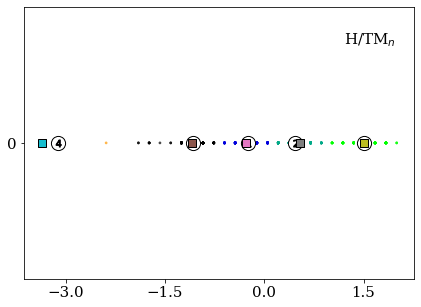

In [17]:
numero=5
X = np.array(X)
XX=X

X = StandardScaler().fit_transform(X) 

#tsnee = TSNE(n_components=2,perplexity=40,random_state=432) ####


#X = tsnee.fit_transform(X) ####

kmeans = cluster.KMeans(init='random', #'k-means++', 
        n_clusters=numero, n_init=10, random_state=0)



ax2 = plt.axes()



#clusterer =cluster.KMeans(n_clusters=params['n_clusters'], random_state=10) tem o meu
cluster_labels = kmeans.fit_predict(X)

    # 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / numero)
ax2.scatter(X[:], np.zeros_like(X), marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:],np.zeros_like(centers), marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
	ax2.scatter(c[0], np.zeros_like(c), marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
#ax2.set_title("Clustered data from H/TM$_n$", fontsize=15)
ax2.xaxis.set_ticks(np.arange(-3, 2, 1.5))
ax2.yaxis.set_ticks([0])
ax2.text(1.2,0.04,"H/TM$_n$", fontsize=15)
plt.gcf().set_size_inches(7, 5)

#plt.suptitle("Silhouette analysis for k-means clustering on sample data", fontsize=14, fontweight='bold')




selected1 = []
clusters = []
val=[]
kmeans.fit(X)
centroids = kmeans.cluster_centers_
if 1==1:
    # for clus in centroids:
    for clus in range(numero):
        idsIn = np.where(kmeans.labels_==clus)
        sel = idsIn[0][0]
        dMin = np.linalg.norm(centroids[clus,:] - X[idsIn[0][0],:])
        for sample in idsIn[0][1:]:
            dist = np.linalg.norm(centroids[clus,:] - X[sample,:])
            if dist < dMin:
                dMin = dist
                sel = sample 
        val.append(X[sel])        
        selected1.append(index[sel])
        clusters.append(idsIn)
print("Selected: ")
print(val)

for i in val:
	ax2.scatter(i[0], 0, marker='s', alpha=1, s=60, edgecolor='k')





#print(len(X))    
#print(len(index))    
#f.suptitle("CH$_4$")    #MUDAR AQUI TAMBEM
plt.show()    
#plt.savefig('KmeansTM-H.pdf', format='pdf', bbox_inches="tight")

In [223]:
selected1 = []
clusters = []
val=[]
kmeans.fit(X)
centroids = kmeans.cluster_centers_
if 1==1:
    # for clus in centroids:
    for clus in range(numero):
        idsIn = np.where(kmeans.labels_==clus)
        sel = idsIn[0][0]
        dMin = np.linalg.norm(centroids[clus,:] - X[idsIn[0][0],:])
        for sample in idsIn[0][1:]:
            dist = np.linalg.norm(centroids[clus,:] - X[sample,:])
            if dist < dMin:
                dMin = dist
                sel = sample 
        val.append(XX[sel])        
        selected1.append(index[sel])
        clusters.append(idsIn)
print("Selected: ")
print(selected1)
print(val)

Selected: 
['Co05-H6', 'Fe08-H15', 'Ni04-H6', 'Co09-H12', 'Cu04-H1', 'Fe09-H4', 'Ni10-H16']
[array([1.7]), array([1.73]), array([1.51]), array([1.76]), array([1.65]), array([1.81]), array([1.6])]


In [38]:
"""
corr_with="E$_{ad}$" #Correlate all properties with this one

el="Ni"
ch="CH4"
#ch="H"

element0=el+str(0)+str(4)+"-"+ch+"_tot_all"
element1=el+str(0)+str(5)+"-"+ch+"_tot_all"
element2=el+str(0)+str(6)+"-"+ch+"_tot_all"
element3=el+str(0)+str(7)+"-"+ch+"_tot_all"
element4=el+str(0)+str(8)+"-"+ch+"_tot_all"
element5=el+str(0)+str(9)+"-"+ch+"_tot_all"
element6=el+str(10)+"-"+ch+"_tot_all"
element7=el+str(11)+"-"+ch+"_tot_all"
element8=el+str(12)+"-"+ch+"_tot_all"
element9=el+str(13)+"-"+ch+"_tot_all"
element10=el+str(14)+"-"+ch+"_tot_all"
element11=el+str(15)+"-"+ch+"_tot_all"



#CH3+H  

Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)


#CH4 e CH3
Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)



# H
Data0=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element0), sep='\s+', index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data1=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element1), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data2=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element2), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data3=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element3), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data4=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element4), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data5=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element5), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data6=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element6), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data7=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element7), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data8=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element8), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data9=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element9), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data10=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element10), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)
Data11=pd.read_csv(str(ch)+'/'+'table_energy_order_'+str(element11), sep='\s+',index_col=None,names=["name","dir","$E_{tot}$","${\Delta}E_{tot}$","$m_{tot}$","${\epsilon}_{homo}$","${\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","${\\theta}_{av}^{HCH}$","${\Delta}$ECN$_{av}$","${\Delta}d_{av}$"],parse_dates=True)



data0 =pd.read_csv('Ead_Ea/table_Eada_'+str(el)+str(0)+str(4),index_col=None, sep='\t')
data1 =pd.read_csv('Ead_Ea/table_Eada_'+str(el)+str(0)+str(5), index_col=None,sep='\t')
data2 =pd.read_csv('Ead_Ea/table_Eada_'+str(el)+str(0)+str(6),index_col=None, sep='\t')
data3 =pd.read_csv('Ead_Ea/table_Eada_'+str(el)+str(0)+str(7),index_col=None, sep='\t')
data4 =pd.read_csv('Ead_Ea/table_Eada_'+str(el)+str(0)+str(8),index_col=None, sep='\t')
data5 =pd.read_csv('Ead_Ea/table_Eada_'+str(el)+str(0)+str(9),index_col=None, sep='\t')
data6 =pd.read_csv('Ead_Ea/table_Eada_'+str(el)+str(10), index_col=None,sep='\t')
data7 =pd.read_csv('Ead_Ea/table_Eada_'+str(el)+str(11),index_col=None, sep='\t')
data8 =pd.read_csv('Ead_Ea/table_Eada_'+str(el)+str(12),index_col=None, sep='\t')
data9 =pd.read_csv('Ead_Ea/table_Eada_'+str(el)+str(13),index_col=None, sep='\t')
data10 =pd.read_csv('Ead_Ea/table_Eada_'+str(el)+str(14),index_col=None, sep='\t')
data11 =pd.read_csv('Ead_Ea/table_Eada_'+str(el)+str(15), index_col=None,sep='\t')



Data0=pd.merge(data0, Data0, how="left", on="dir")
Data1=pd.merge(data1, Data1, how="left", on="dir")
Data2=pd.merge(data2, Data2, how="left", on="dir")
Data3=pd.merge(data3, Data3, how="left", on="dir")
Data4=pd.merge(data4, Data4, how="left", on="dir")
Data5=pd.merge(data5, Data5, how="left", on="dir")
Data6=pd.merge(data6, Data6, how="left", on="dir")
Data7=pd.merge(data7, Data7, how="left", on="dir")
Data8=pd.merge(data8, Data8, how="left", on="dir")
Data9=pd.merge(data9, Data9, how="left", on="dir")
Data10=pd.merge(data10, Data10, how="left", on="dir")
Data11=pd.merge(data11, Data11, how="left", on="dir")



Data0=Data0.astype('string')
Data0=Data0.apply(lambda x: x.str.replace(',','.'))

Data1=Data1.astype('string')
Data1=Data1.apply(lambda x: x.str.replace(',','.'))

Data2=Data2.astype('string')
Data2=Data2.apply(lambda x: x.str.replace(',','.'))

Data3=Data3.astype('string')
Data3=Data3.apply(lambda x: x.str.replace(',','.'))

Data4=Data4.astype('string')
Data4=Data4.apply(lambda x: x.str.replace(',','.'))

Data5=Data5.astype('string')
Data5=Data5.apply(lambda x: x.str.replace(',','.'))

Data6=Data6.astype('string')
Data6=Data6.apply(lambda x: x.str.replace(',','.'))

Data7=Data7.astype('string')
Data7=Data7.apply(lambda x: x.str.replace(',','.'))

Data8=Data8.astype('string')
Data8=Data8.apply(lambda x: x.str.replace(',','.'))

Data9=Data9.astype('string')
Data9=Data9.apply(lambda x: x.str.replace(',','.'))

Data10=Data10.astype('string')
Data10=Data10.apply(lambda x: x.str.replace(',','.'))

Data11=Data11.astype('string')
Data11=Data11.apply(lambda x: x.str.replace(',','.'))

Data3
"""

'\ncorr_with="E$_{ad}$" #Correlate all properties with this one\n\nel="Ni"\nch="CH4"\n#ch="H"\n\nelement0=el+str(0)+str(4)+"-"+ch+"_tot_all"\nelement1=el+str(0)+str(5)+"-"+ch+"_tot_all"\nelement2=el+str(0)+str(6)+"-"+ch+"_tot_all"\nelement3=el+str(0)+str(7)+"-"+ch+"_tot_all"\nelement4=el+str(0)+str(8)+"-"+ch+"_tot_all"\nelement5=el+str(0)+str(9)+"-"+ch+"_tot_all"\nelement6=el+str(10)+"-"+ch+"_tot_all"\nelement7=el+str(11)+"-"+ch+"_tot_all"\nelement8=el+str(12)+"-"+ch+"_tot_all"\nelement9=el+str(13)+"-"+ch+"_tot_all"\nelement10=el+str(14)+"-"+ch+"_tot_all"\nelement11=el+str(15)+"-"+ch+"_tot_all"\n\n\n\n#CH3+H  \n\nData0=pd.read_csv(str(ch)+\'/\'+\'table_energy_order_\'+str(element0), sep=\'\\s+\', index_col=None,names=["name","dir","$E_{tot}$","${\\Delta}E_{tot}$","$m_{tot}$","${\\epsilon}_{homo}$","${\\epsilon}_{lumo}$","$E_g$","$d_{min}^{H^{m}-TM}$","$d_{min}^{C-TM}$","$d_{min}^{H^{\\alpha}-TM}$","${\\theta}_{av}^{HCH}$","${\\Delta}$ECN$_{av}$","${\\Delta}d_{av}$"],parse_dates=True)\n